In [0]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils

In [0]:
np.random.seed(1337)  # for reproducibility

batch_size = 100
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28  # input image dimensions
pool_size = (2, 2)  # size of pooling area for max pooling
kernel_size = (3, 3)  # convolution kernel size


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size, padding='same', 
                 input_shape=(X_train.shape[1],X_train.shape[2],3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=2, validation_split=0.2)

W0723 13:14:52.397332 140616803387264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 - 105s - loss: 1.7370 - accuracy: 0.3613 - val_loss: 1.3914 - val_accuracy: 0.4984
Epoch 2/12
40000/40000 - 105s - loss: 1.3391 - accuracy: 0.5187 - val_loss: 1.1388 - val_accuracy: 0.6034
Epoch 3/12
40000/40000 - 105s - loss: 1.1763 - accuracy: 0.5776 - val_loss: 1.0263 - val_accuracy: 0.6356
Epoch 4/12
40000/40000 - 105s - loss: 1.0650 - accuracy: 0.6222 - val_loss: 0.9347 - val_accuracy: 0.6714
Epoch 5/12
40000/40000 - 105s - loss: 0.9883 - accuracy: 0.6507 - val_loss: 1.0022 - val_accuracy: 0.6481
Epoch 6/12
40000/40000 - 105s - loss: 0.9335 - accuracy: 0.6705 - val_loss: 0.8614 - val_accuracy: 0.7008
Epoch 7/12
40000/40000 - 104s - loss: 0.8804 - accuracy: 0.6907 - val_loss: 0.7930 - val_accuracy: 0.7197
Epoch 8/12
40000/40000 - 105s - loss: 0.8448 - accuracy: 0.7036 - val_loss: 0.8135 - val_accuracy: 0.7129
Epoch 9/12
40000/40000 - 105s - loss: 0.8085 - accuracy: 0.7118 - val_loss: 0.7718 - val_accuracy: 0.7

In [0]:
score = model.evaluate(X_test, Y_test, verbose=2)

print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 - 7s - loss: 0.7104 - accuracy: 0.7531
Test score: 0.7103700290679932
Test accuracy: 0.7531


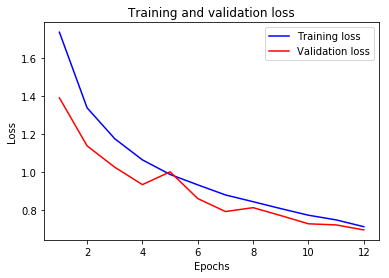

In [0]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

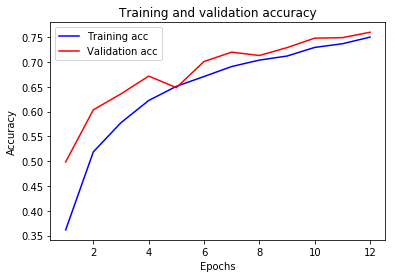

In [0]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()